In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast 
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
EXPERIMENT_LOGS_PATH = os.path.join(PROJECT_ROOT, 'reports', 'experiment_logs')

# Configure plots
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) # Show full content of columns like 'Parameters'

In [2]:
def load_experiment_log(file_name: str, log_path: str = EXPERIMENT_LOGS_PATH) -> pd.DataFrame | None:
    """
    Loads a specific experiment log CSV file.

    Args:
        file_name (str): The name of the CSV log file.
        log_path (str, optional): The path to the experiment logs directory.
                                  Defaults to EXPERIMENT_LOGS_PATH.

    Returns:
        pd.DataFrame | None: Loaded DataFrame or None if the file doesn't exist.
    """
    full_path = os.path.join(log_path, file_name)
    if os.path.exists(full_path):
        try:
            df = pd.read_csv(full_path)
            print(f"Successfully loaded {file_name}. Shape: {df.shape}")
            return df
        except Exception as e:
            print(f"Error loading {file_name}: {e}")
            return None
    else:
        print(f"File not found: {full_path}")
        return None

# Load all the logs
df_classical_ts = load_experiment_log('classical_timeseries_experiments.csv')
df_classical_reg = load_experiment_log('classical_regression_experiments.csv')
df_dl = load_experiment_log('deep_learning_experiments.csv')

# Display head of each loaded DataFrame to verify
if df_classical_ts is not None:
    print("\n--- Classical Time Series Experiments (Head) ---")
    display(df_classical_ts.head())
if df_classical_reg is not None:
    print("\n--- Classical Regression Experiments (Head) ---")
    display(df_classical_reg.head())
if df_dl is not None:
    print("\n--- Deep Learning Experiments (Head) ---")
    display(df_dl.head())

Successfully loaded classical_timeseries_experiments.csv. Shape: (18, 10)
Successfully loaded classical_regression_experiments.csv. Shape: (5, 9)
Successfully loaded deep_learning_experiments.csv. Shape: (2, 11)

--- Classical Time Series Experiments (Head) ---


,Timestamp,Store,Dept,Model,Parameters,Train_Period,Test_Period,MAE,RMSE,MAPE
0,2025-05-21 18:23:09,1,1,DummyModel,"{'order': '(1,1,1)'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,1000.000000,1500.000000,25.000000
1,2025-05-21 18:23:09,4,10,DummyModel,"{'order': '(1,1,1)'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,1000.000000,1500.000000,25.000000
2,2025-05-21 18:23:09,10,72,DummyModel,"{'order': '(1,1,1)'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,1000.000000,1500.000000,25.000000
3,2025-05-21 18:26:07,1,1,NaiveForecast,{'method': 'last_value'},2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,12316.894808,13078.895816,61.604206
4,2025-05-21 18:26:07,1,1,SeasonalNaiveForecast,"{'seasonal_period': 52, 'method': 'last_season_value'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,3615.883269,7960.174286,15.370672



--- Classical Regression Experiments (Head) ---


,Timestamp,Model,Parameters,Train_Period,Test_Period,Features_Count,MAE,RMSE,MAPE
0,2025-05-21 18:39:54,RandomForestRegressor,"{'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'random_state': 42, 'n_jobs': -1, 'model_path': '/Users/ramesh/Desktop/supply_chain_ai_platform/models_store/demand_forecasting/RandomForestRegressor_20250521184033.joblib'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,48,1660.582072,5102.159282,1130.157279
1,2025-05-21 18:39:54,XGBoostRegressor,"{'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05, 'subsample': 0.7, 'colsample_bytree': 0.7, 'objective': 'reg:squarederror', 'random_state': 42, 'n_jobs': -1, 'model_path': '/Users/ramesh/Desktop/supply_chain_ai_platform/models_store/demand_forecasting/XGBoostRegressor_20250521184039.json'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,48,1627.968191,4150.081738,1256.716769
2,2025-05-21 18:42:43,RandomForestRegressor,"{'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'random_state': 42, 'n_jobs': -1, 'model_path': '/Users/ramesh/Desktop/supply_chain_ai_platform/models_store/demand_forecasting/RandomForestRegressor_20250521184327.joblib'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,48,1660.582072,5102.159282,1130.157279
3,2025-05-21 18:42:43,XGBoostRegressor,"{'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05, 'subsample': 0.7, 'colsample_bytree': 0.7, 'objective': 'reg:squarederror', 'random_state': 42, 'n_jobs': -1, 'model_path': '/Users/ramesh/Desktop/supply_chain_ai_platform/models_store/demand_forecasting/XGBoostRegressor_20250521184333.json'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,48,1627.968191,4150.081738,1256.716769
4,2025-05-21 18:42:43,LightGBMRegressor,"{'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.05, 'num_leaves': 63, 'subsample': 0.7, 'colsample_bytree': 0.7, 'objective': 'regression_l1', 'metric': 'mae', 'random_state': 42, 'n_jobs': -1, 'verbose': -1, 'model_path': '/Users/ramesh/Desktop/supply_chain_ai_platform/models_store/demand_forecasting/LightGBMRegressor_20250521184342.txt'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,48,1602.002781,5186.816664,803.763251



--- Deep Learning Experiments (Head) ---


,Timestamp,Store,Dept,Model,Parameters,Train_Period,Test_Period,Features_Count,MAE,RMSE,MAPE
0,2025-05-21 18:47:55,1,1,LSTM_S1D1,"{'lstm_units': 64, 'dropout_rate': 0.25, 'epochs': 10, 'batch_size': 32, 'learning_rate': 0.001, 'patience': 5, 'lr_patience': 3, 'sequence_length': 12, 'input_shape': (12, 23), 'model_path': '/Users/ramesh/Desktop/supply_chain_ai_platform/models_store/demand_forecasting/LSTM_S1D1_20250521184804.keras', 'feature_scaler_path': '/Users/ramesh/Desktop/supply_chain_ai_platform/models_store/demand_forecasting/scalers/feature_scaler_S1D1.joblib', 'target_scaler_path': '/Users/ramesh/Desktop/supply_chain_ai_platform/models_store/demand_forecasting/scalers/target_scaler_S1D1.joblib', 'actual_epochs': 7}",2011-02-04 to <2012-06-22,>2012-06-22 to 2012-10-26,23,2216.059479,2751.114072,10.152815
1,2025-05-21 18:51:16,1,1,LSTM_S1D1,"{'lstm_units': 64, 'dropout_rate': 0.2, 'epochs': 30, 'batch_size': 32, 'learning_rate': 0.001, 'patience': 10, 'lr_patience': 5, 'sequence_length': 12, 'input_shape': (12, 22), 'model_path': '/Users/ramesh/Desktop/supply_chain_ai_platform/models_store/demand_forecasting/LSTM_S1D1_20250521185124.keras', 'feature_scaler_path': '/Users/ramesh/Desktop/supply_chain_ai_platform/models_store/demand_forecasting/scalers/feature_scaler_S1D1_202505211851.joblib', 'target_scaler_path': '/Users/ramesh/Desktop/supply_chain_ai_platform/models_store/demand_forecasting/scalers/target_scaler_S1D1_202505211851.joblib', 'actual_epochs': 15, 'train_period': '2010-03-05 to 2012-04-20', 'test_period': '2012-04-27 to 2012-10-26'}",2010-03-05 to 2012-04-20,2012-04-27 to 2012-10-26,22,4319.569370,4567.082491,22.742321


In [ ]:
all_logs = []
if df_classical_ts is not None:
    df_classical_ts['Log_Type'] = 'Classical_TimeSeries'
    all_logs.append(df_classical_ts)
if df_classical_reg is not None:
    df_classical_reg['Log_Type'] = 'Classical_Regression'
    all_logs.append(df_classical_reg)
if df_dl is not None:
    df_dl['Log_Type'] = 'Deep_Learning'
    all_logs.append(df_dl)

if not all_logs:
    print("No experiment logs were loaded. Cannot proceed with comparison.")
    df_combined_logs = pd.DataFrame() # Empty DataFrame
else:
    df_combined_logs = pd.concat(all_logs, ignore_index=True)
    print("\n--- Combined Experiment Logs (Head) ---")
    display(df_combined_logs.head())
    print(f"\nShape of combined logs: {df_combined_logs.shape}")

    print("\n--- Combined Experiment Logs Info ---")
    df_combined_logs.info()

    def safe_literal_eval(val):
        try:
            return ast.literal_eval(val)
        except (ValueError, SyntaxError, TypeError): # Added TypeError for NaN/None
            return val # Return original if it's not a string or cannot be parsed

    if 'Parameters' in df_combined_logs.columns:
        print("\nConverting 'Parameters' column to dict...")
        df_combined_logs['Parameters_Dict'] = df_combined_logs['Parameters'].apply(safe_literal_eval)
    metric_cols = ['MAE', 'RMSE', 'MAPE']
    for col in metric_cols:
        if col in df_combined_logs.columns:
            df_combined_logs[col] = pd.to_numeric(df_combined_logs[col], errors='coerce')

    print("\n--- Combined Experiment Logs after processing 'Parameters' (Head) ---")
    display(df_combined_logs.head())


--- Combined Experiment Logs (Head) ---


,Timestamp,Store,Dept,Model,Parameters,Train_Period,Test_Period,MAE,RMSE,MAPE,Log_Type,Features_Count
0,2025-05-21 18:23:09,1.0,1.0,DummyModel,"{'order': '(1,1,1)'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,1000.000000,1500.000000,25.000000,Classical_TimeSeries,NaN
1,2025-05-21 18:23:09,4.0,10.0,DummyModel,"{'order': '(1,1,1)'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,1000.000000,1500.000000,25.000000,Classical_TimeSeries,NaN
2,2025-05-21 18:23:09,10.0,72.0,DummyModel,"{'order': '(1,1,1)'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,1000.000000,1500.000000,25.000000,Classical_TimeSeries,NaN
3,2025-05-21 18:26:07,1.0,1.0,NaiveForecast,{'method': 'last_value'},2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,12316.894808,13078.895816,61.604206,Classical_TimeSeries,NaN
4,2025-05-21 18:26:07,1.0,1.0,SeasonalNaiveForecast,"{'seasonal_period': 52, 'method': 'last_season_value'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,3615.883269,7960.174286,15.370672,Classical_TimeSeries,NaN



Shape of combined logs: (25, 12)

--- Combined Experiment Logs Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       25 non-null     object 
 1   Store           20 non-null     float64
 2   Dept            20 non-null     float64
 3   Model           25 non-null     object 
 4   Parameters      25 non-null     object 
 5   Train_Period    25 non-null     object 
 6   Test_Period     25 non-null     object 
 7   MAE             25 non-null     float64
 8   RMSE            25 non-null     float64
 9   MAPE            25 non-null     float64
 10  Log_Type        25 non-null     object 
 11  Features_Count  7 non-null      float64
dtypes: float64(6), object(6)
memory usage: 2.5+ KB

Converting 'Parameters' column to dict...

--- Combined Experiment Logs after processing 'Parameters' (Head) ---


,Timestamp,Store,Dept,Model,Parameters,Train_Period,Test_Period,MAE,RMSE,MAPE,Log_Type,Features_Count,Parameters_Dict
0,2025-05-21 18:23:09,1.0,1.0,DummyModel,"{'order': '(1,1,1)'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,1000.000000,1500.000000,25.000000,Classical_TimeSeries,NaN,"{'order': '(1,1,1)'}"
1,2025-05-21 18:23:09,4.0,10.0,DummyModel,"{'order': '(1,1,1)'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,1000.000000,1500.000000,25.000000,Classical_TimeSeries,NaN,"{'order': '(1,1,1)'}"
2,2025-05-21 18:23:09,10.0,72.0,DummyModel,"{'order': '(1,1,1)'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,1000.000000,1500.000000,25.000000,Classical_TimeSeries,NaN,"{'order': '(1,1,1)'}"
3,2025-05-21 18:26:07,1.0,1.0,NaiveForecast,{'method': 'last_value'},2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,12316.894808,13078.895816,61.604206,Classical_TimeSeries,NaN,{'method': 'last_value'}
4,2025-05-21 18:26:07,1.0,1.0,SeasonalNaiveForecast,"{'seasonal_period': 52, 'method': 'last_season_value'}",2010-02-05 to 2011-10-28,2011-11-04 to 2012-10-26,3615.883269,7960.174286,15.370672,Classical_TimeSeries,NaN,"{'seasonal_period': 52, 'method': 'last_season_value'}"


In [ ]:
if not df_combined_logs.empty:
    print("\n--- Basic Performance Summary ---")
    def get_model_family(model_name):
        if 'Naive' in model_name: return 'Naive Baselines'
        if 'ETS' in model_name: return 'ETS'
        if 'SARIMA' in model_name: return 'SARIMA'
        if 'Prophet' in model_name: return 'Prophet'
        if 'RandomForest' in model_name: return 'RandomForest'
        if 'XGBoost' in model_name: return 'XGBoost'
        if 'LightGBM' in model_name: return 'LightGBM'
        if 'LSTM' in model_name: return 'LSTM'
        return 'Other'

    df_combined_logs['Model_Family'] = df_combined_logs['Model'].apply(get_model_family)

    # Average metrics per Model_Family
    avg_metrics_by_family = df_combined_logs.groupby('Model_Family')[['MAE', 'RMSE', 'MAPE']].mean().sort_values(by='RMSE')
    print("\n--- Average Metrics by Model Family ---")
    display(avg_metrics_by_family)

    # Average metrics per specific Model (if you have variants or want more detail)
    avg_metrics_by_model = df_combined_logs.groupby(['Store', 'Dept', 'Model'])[['MAE', 'RMSE', 'MAPE']].mean()
    # For overall average per specific model name across all store-depts:
    avg_metrics_by_specific_model_overall = df_combined_logs.groupby('Model')[['MAE', 'RMSE', 'MAPE']].mean().sort_values(by='RMSE')
    print("\n--- Average Metrics by Specific Model (Overall) ---")
    display(avg_metrics_by_specific_model_overall)


    # Rank models for each Store-Dept combination based on RMSE
    print("\n--- Top Performing Models per Store-Dept (based on RMSE) ---")
    # Ensure Store and Dept are present and not NaN for grouping
    df_to_rank = df_combined_logs.dropna(subset=['Store', 'Dept', 'RMSE'])
    if not df_to_rank.empty:
        # Convert Store and Dept to int if they are not, to ensure proper grouping if they were read as float
        df_to_rank['Store'] = df_to_rank['Store'].astype(int)
        df_to_rank['Dept'] = df_to_rank['Dept'].astype(int)

        best_models_per_store_dept = df_to_rank.loc[df_to_rank.groupby(['Store', 'Dept'])['RMSE'].idxmin()]
        best_models_summary = best_models_per_store_dept[['Store', 'Dept', 'Model', 'Model_Family', 'RMSE', 'MAE', 'MAPE']].sort_values(by=['Store', 'Dept'])
        display(best_models_summary)

        print("\n--- Count of Best Performing Model Families ---")
        display(best_models_summary['Model_Family'].value_counts())
    else:
        print("Not enough data to rank models per Store-Dept (after dropping NaNs in RMSE).")

else:
    print("Combined logs DataFrame is empty. Skipping performance summary.")


--- Basic Performance Summary ---

--- Average Metrics by Model Family ---


,MAE,RMSE,MAPE
Model_Family,,,
Other,1000.000000,1500.000000,25.000000
LSTM,3267.814424,3659.098282,16.447568
XGBoost,1627.968191,4150.081738,1256.716769
RandomForest,1660.582072,5102.159282,1130.157279
LightGBM,1602.002781,5186.816664,803.763251
Naive Baselines,10560.456955,15551.609425,22.037352
Prophet,22471.834382,27745.760419,99.870781



--- Average Metrics by Specific Model (Overall) ---


,MAE,RMSE,MAPE
Model,,,
DummyModel,1000.000000,1500.000000,25.000000
LSTM_S1D1,3267.814424,3659.098282,16.447568
XGBoostRegressor,1627.968191,4150.081738,1256.716769
RandomForestRegressor,1660.582072,5102.159282,1130.157279
LightGBMRegressor,1602.002781,5186.816664,803.763251
SeasonalNaiveForecast,6896.963878,10284.550738,12.235707
NaiveForecast,14223.950032,20818.668111,31.838996
Prophet,22471.834382,27745.760419,99.870781



--- Top Performing Models per Store-Dept (based on RMSE) ---


/var/folders/q2/7hnc3ms1333dvg43gyhqwgt40000gn/T/ipykernel_93441/4220952832.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_rank['Store'] = df_to_rank['Store'].astype(int)
/var/folders/q2/7hnc3ms1333dvg43gyhqwgt40000gn/T/ipykernel_93441/4220952832.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_rank['Dept'] = df_to_rank['Dept'].astype(int)


,Store,Dept,Model,Model_Family,RMSE,MAE,MAPE
0,1,1,DummyModel,Other,1500.000000,1000.000000,25.000000
13,1,2,SeasonalNaiveForecast,Naive Baselines,2581.609897,1891.566731,3.957876
1,4,10,DummyModel,Other,1500.000000,1000.000000,25.000000
2,10,72,DummyModel,Other,1500.000000,1000.000000,25.000000



--- Count of Best Performing Model Families ---


Model_Family
Other              3
Naive Baselines    1
Name: count, dtype: int64


--- Visual Comparison: Average Metrics by Model Family ---


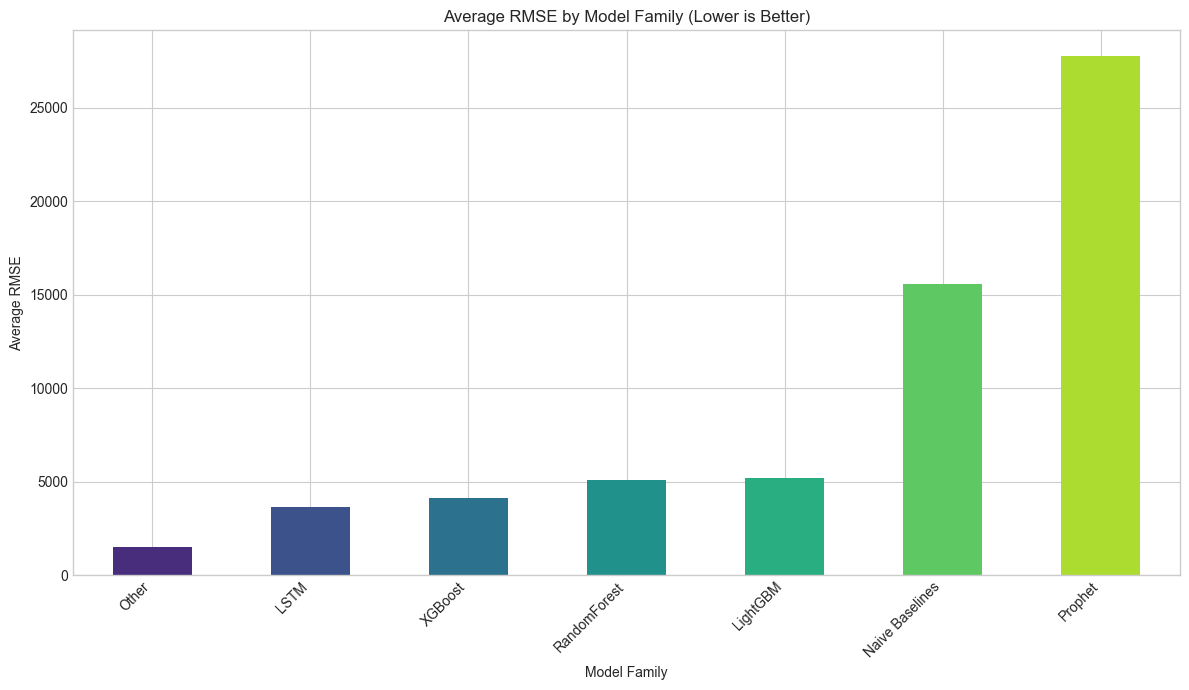

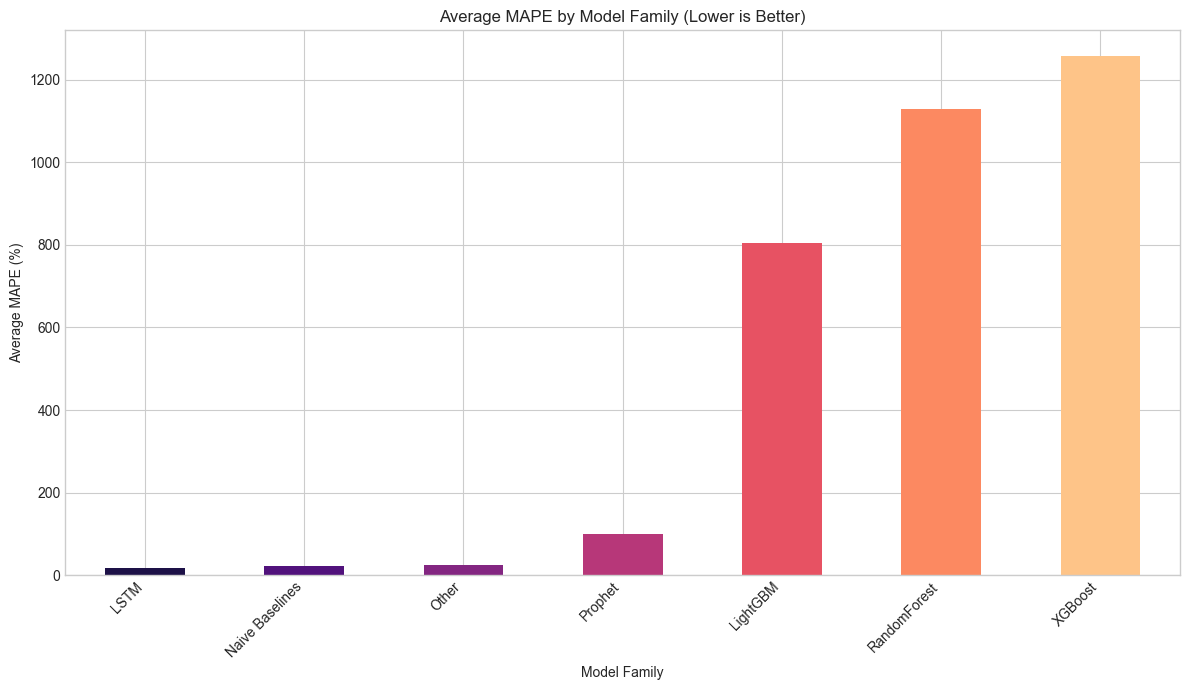

In [ ]:
if not df_combined_logs.empty and not avg_metrics_by_family.empty:
    print("\n--- Visual Comparison: Average Metrics by Model Family ---")

    # Bar plot for average RMSE
    plt.figure(figsize=(12, 7))
    avg_metrics_by_family['RMSE'].sort_values(ascending=True).plot(kind='bar', color=sns.color_palette('viridis', len(avg_metrics_by_family)))
    plt.title('Average RMSE by Model Family (Lower is Better)')
    plt.ylabel('Average RMSE')
    plt.xlabel('Model Family')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Bar plot for average MAPE
    plt.figure(figsize=(12, 7))
    avg_metrics_by_family['MAPE'].sort_values(ascending=True).plot(kind='bar', color=sns.color_palette('magma', len(avg_metrics_by_family)))
    plt.title('Average MAPE by Model Family (Lower is Better)')
    plt.ylabel('Average MAPE (%)')
    plt.xlabel('Model Family')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
    print("Cannot generate bar plots as combined logs or average metrics are empty.")


--- Visual Comparison: Distribution of Metrics by Model Family ---


/var/folders/q2/7hnc3ms1333dvg43gyhqwgt40000gn/T/ipykernel_93441/848215772.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined_logs, x='Model_Family', y='RMSE', palette='coolwarm', order=order)


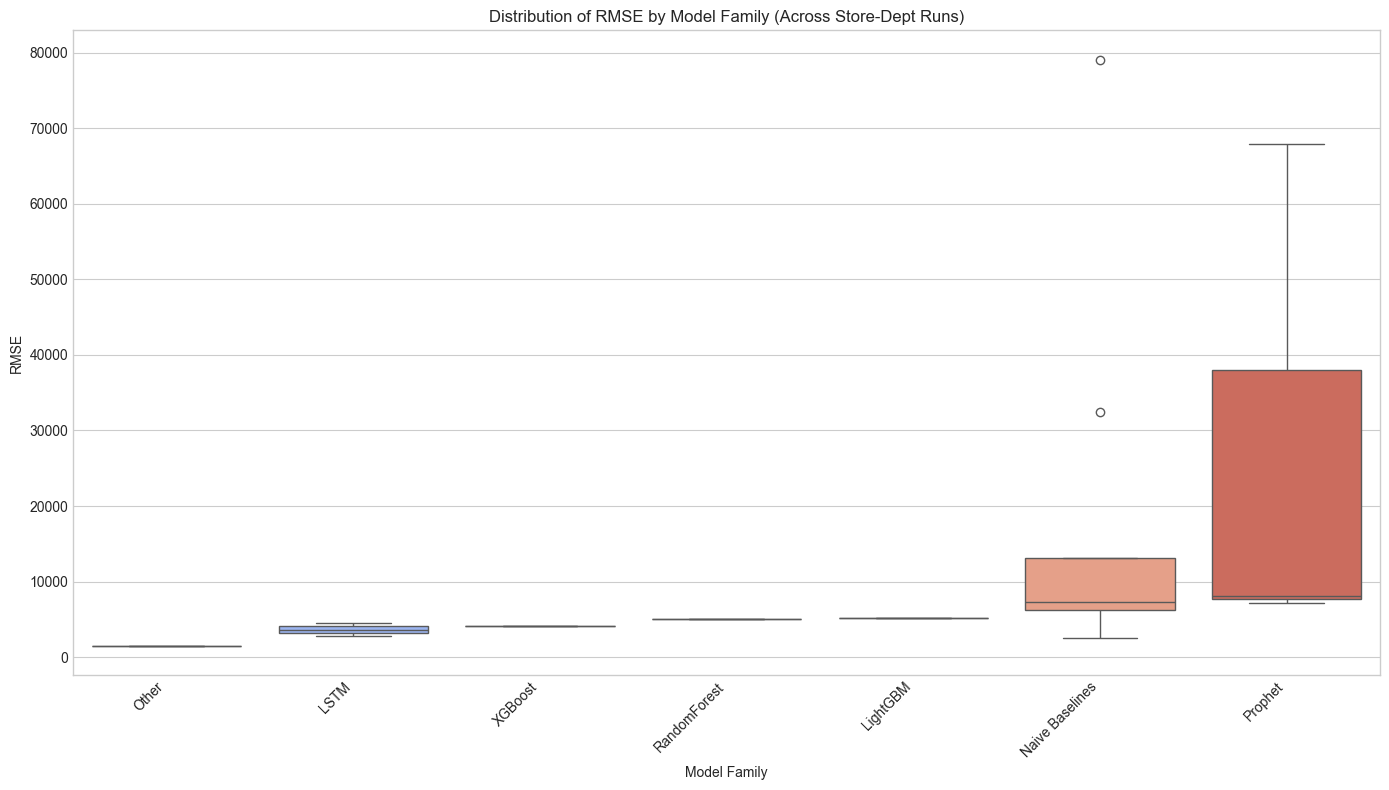

/var/folders/q2/7hnc3ms1333dvg43gyhqwgt40000gn/T/ipykernel_93441/848215772.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mape_filtered_df, x='Model_Family', y='MAPE', palette='YlGnBu', order=order_mape)


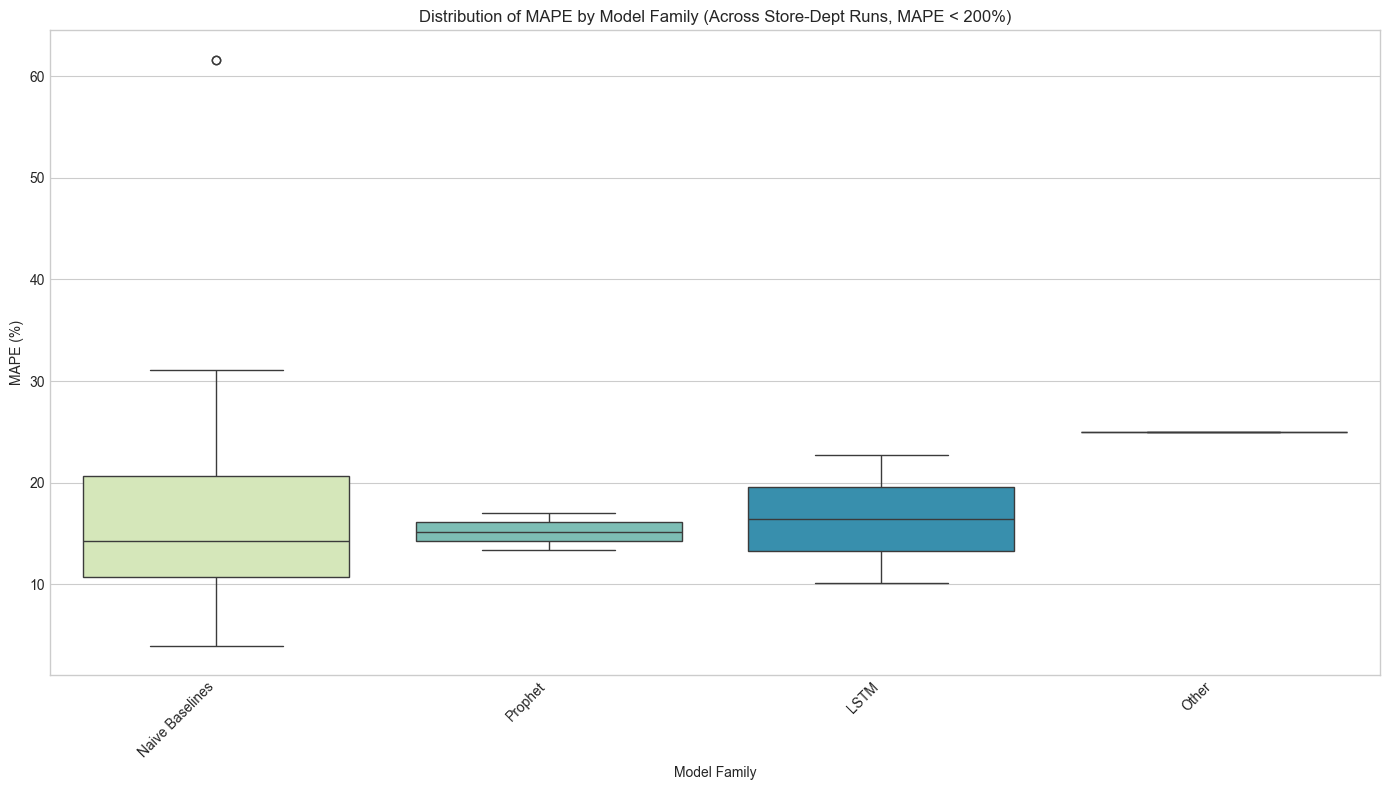

In [6]:
if not df_combined_logs.empty:
    print("\n--- Visual Comparison: Distribution of Metrics by Model Family ---")

    # Box plot for RMSE distribution
    plt.figure(figsize=(14, 8))
    # Order by median RMSE for better visualization
    order = df_combined_logs.groupby('Model_Family')['RMSE'].median().sort_values().index
    sns.boxplot(data=df_combined_logs, x='Model_Family', y='RMSE', palette='coolwarm', order=order)
    plt.title('Distribution of RMSE by Model Family (Across Store-Dept Runs)')
    plt.ylabel('RMSE')
    plt.xlabel('Model Family')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Box plot for MAPE distribution
    plt.figure(figsize=(14, 8))
    # Order by median MAPE
    # Filter out extreme MAPE values for better boxplot visualization if necessary
    mape_filtered_df = df_combined_logs[df_combined_logs['MAPE'].notna() & (df_combined_logs['MAPE'] < 200)] # Example filter
    if not mape_filtered_df.empty:
        order_mape = mape_filtered_df.groupby('Model_Family')['MAPE'].median().sort_values().index
        sns.boxplot(data=mape_filtered_df, x='Model_Family', y='MAPE', palette='YlGnBu', order=order_mape)
        plt.title('Distribution of MAPE by Model Family (Across Store-Dept Runs, MAPE < 200%)')
    else:
        # Plot without filter if filter results in empty df
        order_mape = df_combined_logs.groupby('Model_Family')['MAPE'].median().sort_values().index
        sns.boxplot(data=df_combined_logs, x='Model_Family', y='MAPE', palette='YlGnBu', order=order_mape)
        plt.title('Distribution of MAPE by Model Family (Across Store-Dept Runs, All Values)')
        
    plt.ylabel('MAPE (%)')
    plt.xlabel('Model Family')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot generate box plots as combined logs are empty.")